# Predict delivery time using sorting time 

## Importing Relevant Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats

## Importing Data and Prepare

In [146]:
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
# Renaming Columns 
df.rename(columns={'Delivery Time': 'DeliveryTime', 'Sorting Time': 'SortingTime'}, inplace=True)
df.columns

Index(['DeliveryTime', 'SortingTime'], dtype='object')

In [162]:
# mark Response variable (y) and Predictor (X)
X = df.iloc[:,0].values.reshape(-1,1)
y = df.iloc[:,1].values
X,y

(array([[21.  ],
        [13.5 ],
        [19.75],
        [24.  ],
        [29.  ],
        [15.35],
        [19.  ],
        [ 9.5 ],
        [17.9 ],
        [18.75],
        [19.83],
        [10.75],
        [16.68],
        [11.5 ],
        [12.03],
        [14.88],
        [13.75],
        [18.11],
        [ 8.  ],
        [17.83],
        [21.5 ]]),
 array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
         7,  2,  7,  5]))

Text(0, 0.5, 'DeliveryTime')

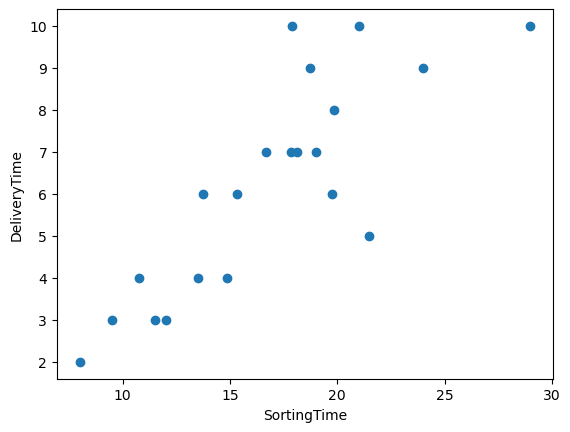

In [51]:
# check whether there is a linear pattren between X and y
plt.scatter(df.DeliveryTime,df.SortingTime)
plt.xlabel('SortingTime')
plt.ylabel("DeliveryTime")

In [52]:
# Define different transformations
transformations = {
    'Original': lambda x: x,
    'Log Transformation': np.log,
    'Square Root Transformation': np.sqrt,
    'Reciprocal Transformation': lambda x: 1/x
}

In [75]:
# to store results
results = pd.DataFrame(columns=['Transformation', 'R-squared', 'Intercept', 'Coefficient'])

## Building model and iterate over each transformation

In [141]:
# Fit linear regression 
for name, transformation in transformations.items():
    X_transformed = transformation(X)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_transformed, y)
    
    # predictions
    y_pred = model.predict(X)
    
    results.loc[len(results)] = [name, r2_score(y, y_pred), model.intercept_, model.coef_]


In [78]:
results

,Transformation,R-squared,Intercept,Coefficient
0,Original,0.682271,-0.756673,[0.413743628050077]
1,Log Transformation,0.710948,-12.499233,[6.7355484133868995]
2,Square Root Transformation,0.704050,-7.615364,[3.4072674682937216]
3,Reciprocal Transformation,0.681651,12.323676,[-93.53812804841903]


# Model using ols with a log transformation applied to the predictor variable

In [152]:
df1 = df.copy()
df1['X'] = np.log(X)
model_fit = smf.ols('y~X', data = df1).fit()

In [153]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           1.59e-06
Time:                        15:54:00   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4992      2.751     -4.543      0.000     -18.257      -6.741
X              6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# fitted values and residuals
residuals = model_fit.resid
fitted_values = model_fit.fittedvalues

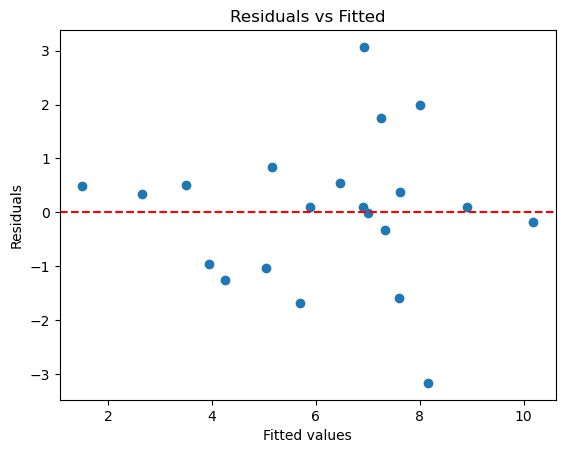

In [155]:
# Residuals vs Fitted: Check for homoscedasticity

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

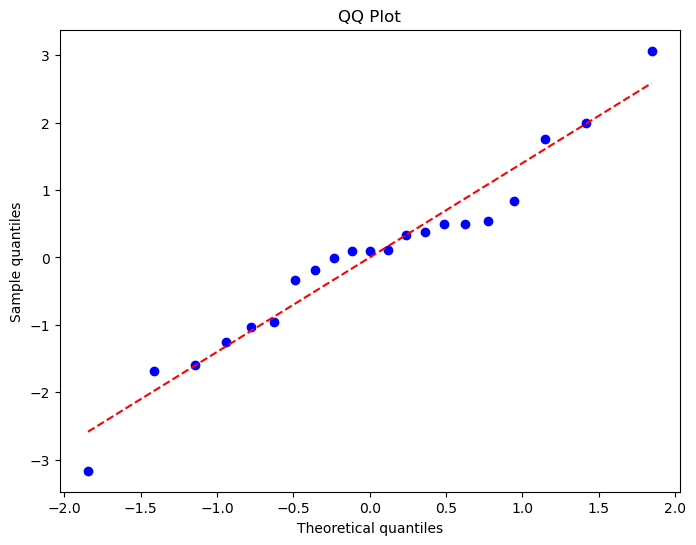

In [128]:
# QQ Plot: Check for normality of residuals

fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(model_fit.resid, dist="norm", plot=ax)
ax.get_lines()[1].set_linestyle('--') 
ax.set_title('QQ Plot')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Sample quantiles')
plt.show()

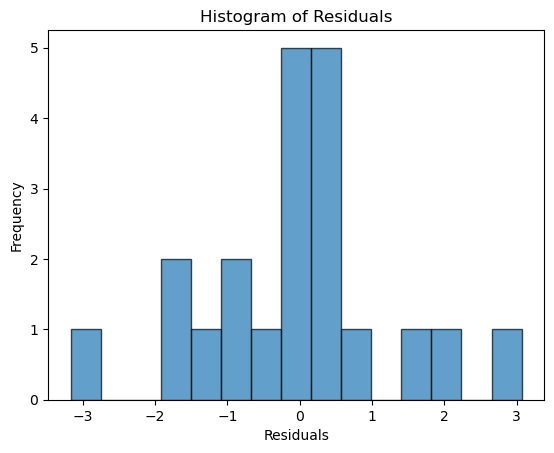

In [125]:
# Histogram of Residuals: Visualize the distribution of residuals

plt.hist(residuals, bins=15, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

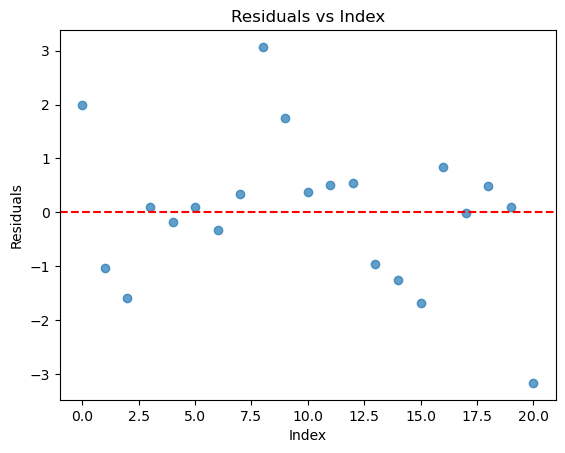

In [156]:
# Residuals vs Index: Check for independence of residuals

plt.scatter(df1.index, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Index')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

## Predictions

In [159]:
X_values = np.random.randint(0, 10, size=5) 
data = pd.DataFrame({'X': X_values})
data.head()

,X
0,4
1,3
2,3
3,6
4,8


In [160]:
predicted_values = model_fit.predict(data)

In [161]:
print(predicted_values)

0    14.442961
1     7.707413
2     7.707413
3    27.914058
4    41.385155
dtype: float64
